In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#plot styling
sns.set(style='whitegrid')
#load dataset
df=pd.read_csv('global_superstore.csv',encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,"July 31, 2012",7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,"February 5, 2013",2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,"October 17, 2013",10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,"January 28, 2013",1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,"November 5, 2013",11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
#handle missing values
print("Missing values:\n",df.isnull().sum())

#example handling
df['Sales']=df['Sales'].fillna(df['Sales'].mean())
df['Profit']=df['Profit'].fillna(df['Profit'].median())

#ddrop any remaining nulls
df.dropna(inplace=True)

Missing values:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [5]:
# Cell 4: Remove Duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Cell 5: Remove Outliers Using IQR Method
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Profit'] < (Q1 - 1.5 * IQR)) | (df['Profit'] > (Q3 + 1.5 * IQR)))]


In [8]:
# Cell 6: Descriptive Stats
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,7283.000000,7283.000000,7283.000000,7283.000000,7283.000000,7283.000000,7283.000000
mean,36298.861046,56025.871756,71.053299,3.461348,0.147537,9.192649,7.815831
std,2885.485460,32157.821738,128.475938,2.034037,0.196880,12.540838,16.731447
min,31297.000000,1453.000000,0.444000,1.000000,0.000000,-23.364000,0.010000
25%,33823.500000,23666.000000,12.840000,2.000000,0.000000,2.100000,1.060000
50%,36290.000000,60505.000000,29.960000,3.000000,0.200000,6.674000,2.670000
75%,38793.000000,90032.000000,73.200000,5.000000,0.200000,15.552000,7.350000
max,41289.000000,99301.000000,2803.920000,14.000000,0.800000,44.476800,287.770000


In [9]:
# Cell 7: Correlation Matrix
corr_matrix = df.select_dtypes(include=['number']).corr()
corr_matrix

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.018672,0.006532,0.001248,0.012912,-0.005636,-0.000571
Postal Code,0.018672,1.000000,0.065853,0.024029,0.041908,0.004581,0.051247
Sales,0.006532,0.065853,1.000000,0.136519,-0.042110,0.254494,0.814442
Quantity,0.001248,0.024029,0.136519,1.000000,0.005084,0.190061,0.100421
Discount,0.012912,0.041908,-0.042110,0.005084,1.000000,-0.473280,-0.032535
Profit,-0.005636,0.004581,0.254494,0.190061,-0.473280,1.000000,0.214356
Shipping Cost,-0.000571,0.051247,0.814442,0.100421,-0.032535,0.214356,1.000000


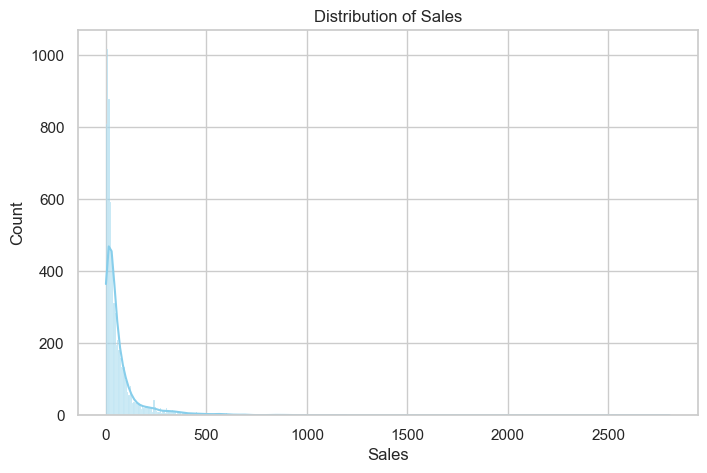

In [10]:
# Cell 8: Histogram for Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.show()

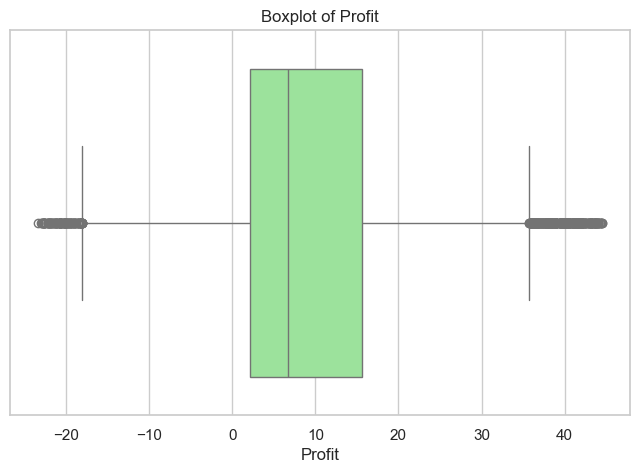

In [11]:
# Cell 9: Boxplot for Profit
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Profit'], color='lightgreen')
plt.title('Boxplot of Profit')
plt.show()

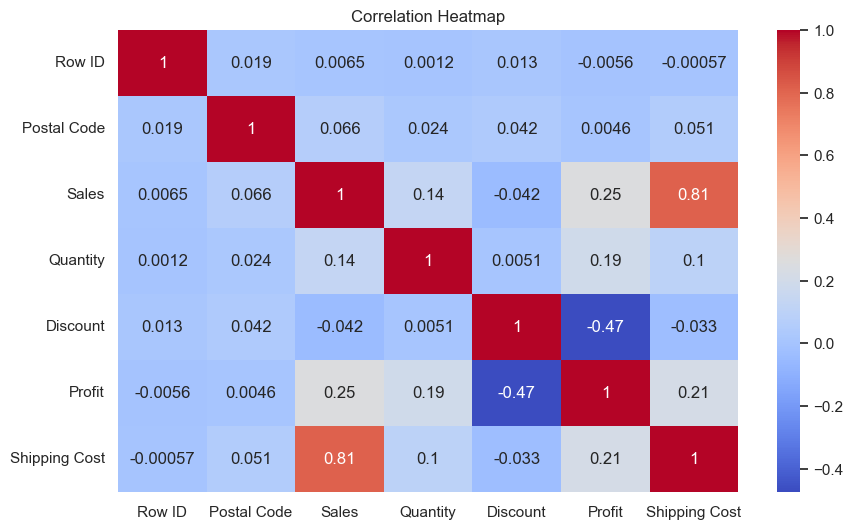

In [12]:
# Cell 10: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
